# Informe Trocafone

## Cosas dignas de destacar: ¿?




---

###### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## ETL
### Carga y deduplicación

In [4]:
#troca = pd.read_csv('data/events.csv', encoding='UTF-8', low_memory = False, parse_dates = ['timestamp'])
#troca_dedup = troca.drop_duplicates()
#troca.count(), troca_dedup.count()

### Saco información de columnas existentes en el dataframe de Trocafone
* marca
* día de la semana
* momento del día
* pais de los eventos que no lo tienen (a traves de un join con país del usuario existente en otros eventos).
* region de los eventos que no la tienen (a traves de un join con país del usuario existente en otros eventos).
* ciudad de los eventos que no la tienen (a traves de un join con país del usuario existente en otros eventos).

In [10]:
# De model, extraigo la marca
if 'marca' in troca.columns:
    troca.drop(['marca'], axis=1, inplace=True)

marca = troca.model.str.split().str.get(0)
troca.insert(loc=6, column='marca', value=marca)
troca.head(1)

,timestamp,dia_semana,event,person,url,sku,marca,model,condition,storage,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,Thursday,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
if 'dia_semana' in troca.columns:
    troca.drop(['dia_semana'], axis=1, inplace=True)

dia_semana = troca['timestamp'].apply(lambda x : x.strftime('%A'))
troca.insert(loc=1, column='dia_semana', value=dia_semana)
troca.head(1)

,timestamp,dia_semana,event,person,url,sku,marca,model,condition,storage,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,Thursday,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Agrego información de otros dataframes oficiales
* coordenadas de ciudades y geojson de paises

### Creo dataframes por evento
##### Cantidad de eventos por tipo

In [12]:
troca['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [13]:
view_prod = troca[troca.event == 'viewed product'].dropna(axis=1, how='all').drop('event', axis=1)
view_prod.head(1)

,timestamp,dia_semana,person,sku,marca,model,condition,storage,color
2,2018-05-31 23:38:09,Thursday,0004b0a2,2694.0,iPhone,iPhone 5s,Bom,32GB,Cinza espacial


In [ ]:
brand_listing = troca[troca.event == 'brand listing'].dropna(axis=1, how='all').drop('event', axis=1)
brand_listing.head(1)

In [ ]:
visited_site = troca[troca.event == 'visited site'].dropna(axis=1, how='all').drop('event', axis=1)
visited_site.head(1)

In [ ]:
ad_hit = troca[troca.event == 'ad campaign hit'].dropna(axis=1, how='all').drop('event', axis=1)
ad_hit.head(1)

In [ ]:
generic_listing = troca[troca.event == 'generic listing'].dropna(axis=1, how='all').drop('event', axis=1)
generic_listing.head(1)

In [14]:
searched_products = troca[troca.event == 'searched products'].dropna(axis=1, how='all').drop('event', axis=1)
searched_products.head(1)


,timestamp,dia_semana,person,skus,search_term
157,2018-02-06 02:29:49,Tuesday,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4


In [ ]:
search_engine_hit = troca[troca.event == 'search engine hit'].dropna(axis=1, how='all').drop('event', axis=1)
search_engine_hit.head(1)

In [ ]:
checkout = troca[troca.event == 'checkout'].dropna(axis=1, how='all').drop('event', axis=1)
checkout.head(1)

In [ ]:
staticpage = troca[troca.event == 'staticpage'].dropna(axis=1, how='all').drop('event', axis=1)
staticpage.head(1)

In [15]:
conversion = troca[troca.event == 'conversion'].dropna(axis=1, how='all').drop('event', axis=1)
conversion.head(1)

,timestamp,dia_semana,person,sku,marca,model,condition,storage,color
220,2018-03-20 17:46:12,Tuesday,00204059,3084.0,Motorola,Motorola Moto X2,Muito Bom,32GB,Couro Vintage


### Lead

“lead”: El usuario se registra para recibir una notificación de disponibilidad de stock, para un producto que no se encontraba disponible en ese momento.

* hay usuarios que hacen más pedidos?
* qué modelos estan en falta?

In [23]:
lead = troca[troca.event == 'lead'].dropna(axis=1, how='all').drop('event', axis=1)

# Muestro lead ordenado por fecha
lead.sort_values(by='timestamp', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(1)

,timestamp,dia_semana,person,marca,model
476477,2018-01-03 12:52:30,Wednesday,799b6d87,Samsung,Samsung Galaxy J7


In [27]:
# agrupo por marca, modelo y usuario que hace el pedido, para tener una idea de la información que hay
lead_by_marca = lead.groupby(['marca', 'model', 'person'])
lead_by_marca[['marca', 'model', 'person','timestamp']].describe().head(1)

marca                               \
                                        count unique   top freq first last   
marca model                    person                                        
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d     1      1  Asus    1   NaN  NaN   

                                        model         \
                                        count unique   
marca model                    person                  
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d     1      1   

                                                                        \
                                                              top freq   
marca model                    person                                    
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d  Asus Zenfone 3 Max 16 GB    1   

                                                ...             person       \
                                                ...                top freq   
marca model                    person           ...                           
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d         ...           5f25cb5d    1   

                                                   timestamp         \
                                        first last     count unique   
marca model                    person                                 
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d   NaN  NaN         1      1   

                                                                   \
                                                         top freq   
marca model                    person                               
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d  2018-04-18 18:09:37    1   

                                                              \
                                                       first   
marca model                    person                          
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d  2018-04-18 18:09:37   

                                                              
                                                        last  
marca model                    person                         
Asus  Asus Zenfone 3 Max 16 GB 5f25cb5d  2018-04-18 18:09:37  

[1 rows x 24 columns]

In [28]:
# Ver a quien aplicar una estrategia de carro abandonado (enviar publicidad de un producto que pidió o similares):
cant_pedidos_por_marca = lead_by_marca['timestamp'].count().sort_values(ascending=False)
cant_pedidos_por_marca.head(10)

marca     model                        person  
Samsung   Samsung Galaxy J7 Prime      97e0bcf2    14
iPhone    iPhone 6S Plus               58692743     6
          iPhone 8                     aaf00dd9     5
Lenovo    Lenovo Vibe A7010 Dual Chip  d5661793     4
Motorola  Motorola Moto G4 Plus        e1eea411     3
          Motorola Moto G5 Plus        52a4edd3     3
          Motorola Moto G5S Plus       a0509b29     3
iPhone    iPhone 6 Plus                52a4edd3     3
                                       f21b8696     3
Motorola  Motorola Moto G3 4G          52a4edd3     3
Name: timestamp, dtype: int64

In [31]:
# Los modelos que están faltos de stock más seguido (los más pedidos)
lead_por_marca_modelo = lead.loc[:,['timestamp','marca','model']].groupby(['marca','model']).count().sort_values('timestamp', ascending=False)
lead_por_marca_modelo.head()

timestamp
marca   model                             
iPhone  iPhone 6 Plus                   35
        iPhone 6S Plus                  31
Samsung Samsung Galaxy J7 Prime         26
iPhone  iPhone 6S                       21
        iPhone 8                        20

Text(0,0.5,'Cantidad de pedidos')

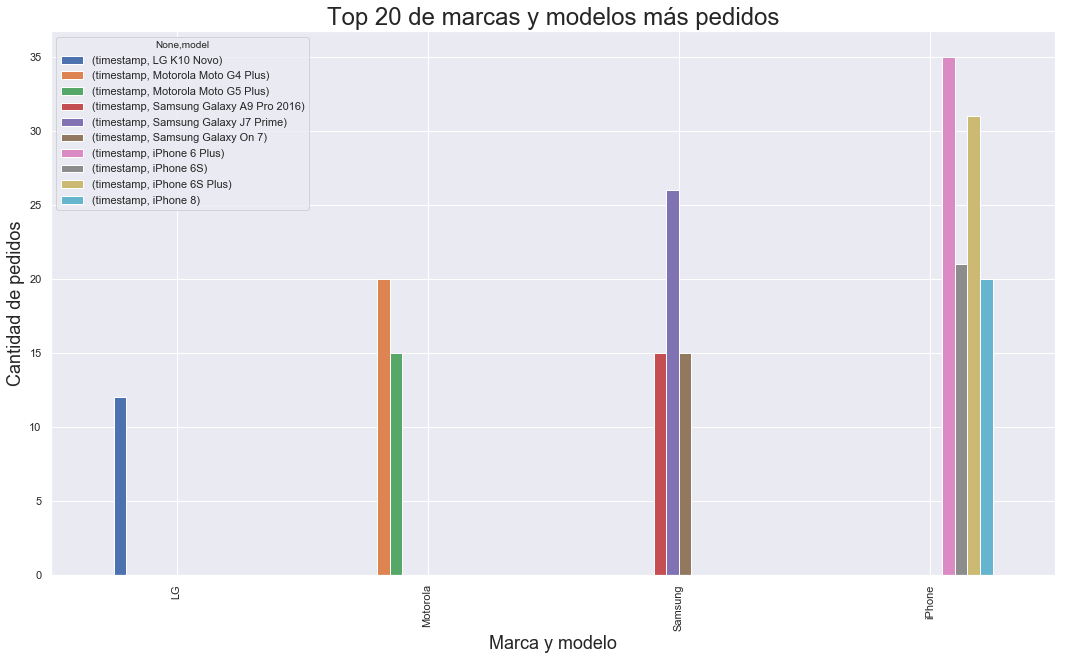

In [32]:
lead_por_solo_marca = lead.loc[:,['timestamp','marca','model']].groupby(['marca','model']).count().sort_values('timestamp', ascending=False).head(10).unstack('model').fillna(0)

_ = lead_por_solo_marca.plot(kind='bar', figsize=(18,10))
_.set_title('Top 20 de marcas y modelos más pedidos', fontsize=24)
_.set_xlabel('Marca y modelo', fontsize=18)
_.set_ylabel('Cantidad de pedidos', fontsize=18)